# Rapport

### Introduksjon

Jeg har valgt alternativ 1, "løse virkelige problemer ved å bruke LLM". Problemstillingene jeg vurderte var flere, og jeg vurderte blant annet muligheten for å automatisere analysen beskrevet i alternativ 2. En slik løsning kunne spart en dataviter for mye tid brukt på repeterende dataanalyser. Valget mitt falt imidlertid tilbake på en chatbot, eller mer konkret: en SQL-agent/chatbot som automatisk kan generere SQL-spørringer fra naturlige språkspørsmål. Målet med oppgaven er å demonstrere hvordan man effektivt kan bruke moderne verktøy som LangChain, Groq og Streamlit for å lage en velfungerende løsning innenfor tidsbegrensningene. De nevnte verktøyene virker å være svært populære og enkle bruke som passer bra nå med en kort tidsbegrensing. LangChain brukes for å enkelt sette opp en agent. Groq brukes for å enkelt ved bruk av en API nøkkel koble seg opp mot en språkmodell. Streamlit brukes for å sette opp en enkel user-interface. Dataen jeg ønsker at chatboten skal kunne hente er i hovedsak geodata, men den kan også fungere til andre dataset. I dette PoC-prosjektet har jeg brukt AndromeLaksefisk data fra geonorge. Dette er rett og slett fordi dette var det første og beste datasettet jeg fant som var mulig å laste ned som geojson, som gjorde jobbe min med å tilføre data til databasen ganske så lett og effektiv. 

### Planleggingsfase

Jeg starter med å utføre en MoSCoW analyse av prosjektet for å få et overordnet blikk av hva jeg skal ha med, burde ha med, kan ha med og det jeg ikke skal ha med. Dette kan spare meg tid og hjelpe meg med å lage konrete oppgaver. 

| Kategori    | Beskrivelse                                          |
|-------------|------------------------------------------------------|
| **Must Have**   | - Databaser (geodata)<br>- Språkmodell<br>- Test og trenings data (geodata)<br>- Spesifikk test og trenings data til datasettet<br>- Databeskyttelse |
| **Should Have** | - Frontend<br>- Norsk og engelsk<br>- Tilbakemelding fra chatboten ved "feil" input<br>- Returnere query / sikkerhetsprosent på svar<br>- Raske svar |
| **Could Have**  | - Vise informasjon i kart<br>- Chat-minne |
| **Won't Have**  | - Tale<br>- Feil/urelevant svar<br>- Real time oppdatering<br>- App |


### Utvikling

Setter opp en database i postgres. Postgres passer bra til geodata. Velger å laste ned åpne datasett fra geonorge og legger dem til ved databasen. Dette var litt knotete, men gikk bra til slutt da jeg valgte å bare gå for data som kunne lastes ned som geojson format. 

Setter opp alle nødvendige moduler (mvp), og implementer deretter all koden som skal til for en enkel chatbot i Python. Bruker llm fra groq, streamlit for UI og langchain for å hjelpe med mye av implementeringa. Får en fungerende chatbot, men opplever at noen ting er litt knotete. 

Leste litt i dokumentasjonen til LangChain og fant ut at jeg kunne bruke ferdige funksjoner som reduserte koden betraktelig. Denne reduseringen var en kjempe fordel for dette prosjektet, men det kan alikevel være noen fordeler med å utvilke denne koden selv dersom man ønsker en veldig spisset og trygg chatbot. Siden dette er et PoC ønsker jeg å benytte meg av alle disse integrete funksjonene. Det samme gjelder også for oppsettet av språkmodellen; at det er en API gjør det enkelt å koble seg til, mens ved produksjon så ville man kanskje ønske å kjøre modellen lokalt. 

Chatboten klarer å sette sammen queries og hente ut informasjon fra databasen. Enn så lenge har den slitt med geometry, som ville gjort det mulig å plotte funnene i et kart som chatboten også skulle vise sammen med resultatet. Promptet som er brukt er LangChain sitt default prompt som er litt vagt og ikke spisset mot den oppgaven denne agenten har fått. Dette promptet må derfor endres ettersom at den er litt misvisende ovenfor hva agenten skal. Til tekst basert data funger dette promptet greit. 

### Lærdom 

Til neste gang så skal jeg gjøre litt mer research i dokumentasjonen på til de bibliotekene jeg bruker, ettersom at det kunne spart meg for en del knot med selvprodusert kode, som allerede eksiterer. F.eks. så har LangChain en funksjon som heter create_sql_agent som man kan gjette seg til hva gjør. Dette hadde jeg gjort på egenhånd, som fungerte, men var helt unødvendig og ikke like bra i den forstand at den innebygde funksjonen har flere nyttige funksjonaliteter.  

Har lært en god del om hvordan man kan benytte seg av LangChain for å bygge agenter, og vil til neste gang lære meg mer om hvordan testingen av modellen fungerer. Det er tross alt viktigst at man kan stole på det modellen gir deg, og ikke minst at den er rask, skal man ville bruke den. Modellen min har vært ganske treig; på det treigeste brukte den 4 minutter som gikk til prøving og feiling. For en som er erfaren med SQL, hadde det sikkert ikke tatt et minutt en gang. Spørmålet modellen fikk i dette eksempelet var, "Vis meg de 5 første radene i tabellen AnadromeLaksefisk_fixed". Årsaken er til den lange tidsbruken er at den produserer mye feil, men den har stort sett gitt riktig output til slutt. 

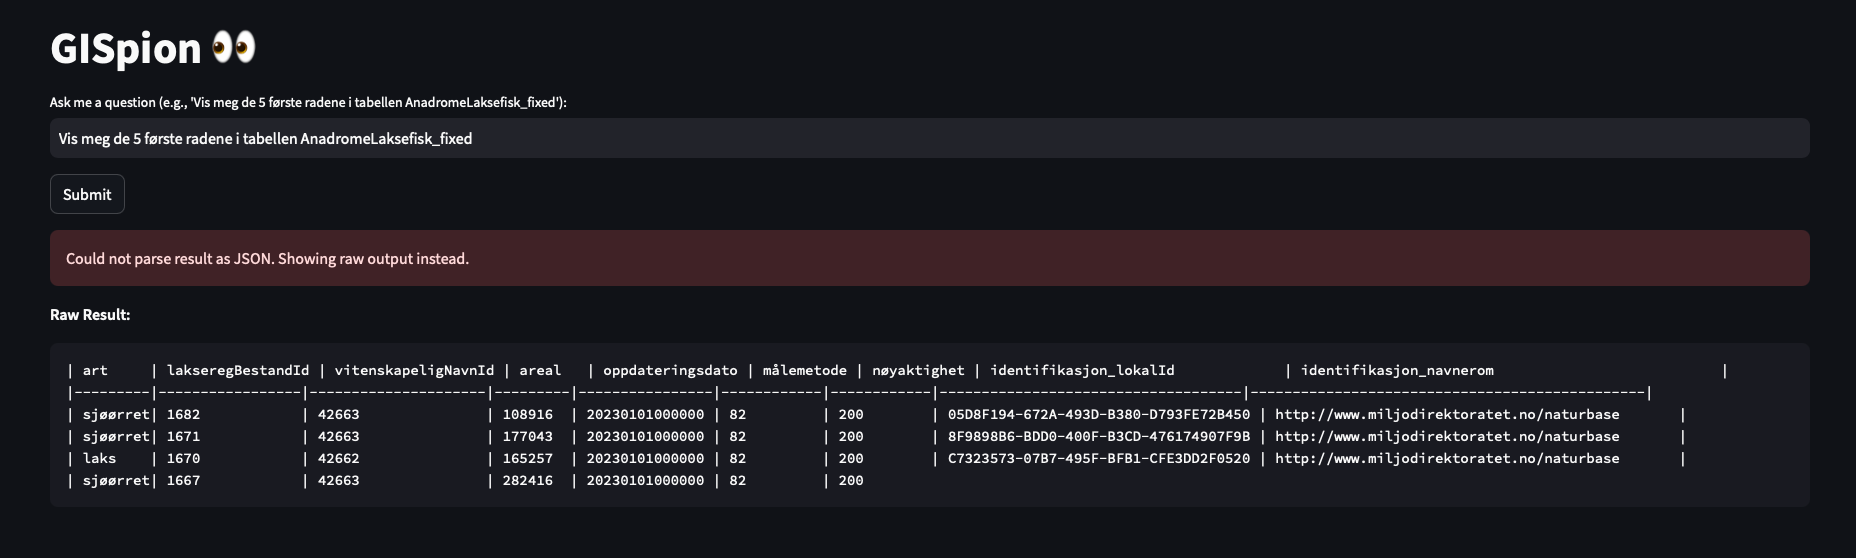

Over er et eksempel på UI'en hvor spørsmålet som er diskutert litt over har blitt spurt til modellen. Default prompte til LangChain gjør at agenten bruker CREATE og setter opp daten uten geometry som gjør at den sliter denne kolonnen. Ellers så gir den det den har blitt bedt om nokså bra. 

### Evaluering av Prosjektet 

For å ta utgangspunkt i hvorvidt jeg klarte å oppfylle punktene i MoSCoW-analysen, er jeg fornøyd. Med bedre tid tror jeg alt er veldig oppnålig. Skulle gjerne hatt litt mer og annerledes type data. Det kunne f.eks. hvert veidata. Språkmodellen jeg brukte var qwen coder, men jeg skulle gjerne ha testet ut litt fler. Jeg tror llama har noen varianter som vil fungere bra om man spisser den inn til denne oppgaven. Databeskyttelsen gikk ut på å beskytte passord og API nøkler, og dette ble gjort med en .env fil som ble ignorert av git. Det ble ikke noe test- og treningsdata for denne gang, men i ettertid så tror jeg at modellen kunne hatt godt av det som kalles few-shot-prompting. Man gir da modellen noen eksempler på hvordan spørmålene den vil få kan se ut, og hvordan querien til spørsmålet er. Jeg vet Harrison Chase, CEO'en av LangChain, mente at few-shot-prompting har gitt stort utbytte hos flere slike modeller (fra en podcast). 

Det ble også en frontend, hvor man kan stille spørmål og få resultatet ut rett under. Den kunne sett bedre ut, og har store potensialer ved bruker opplevelsen, men alt i alt så er den på plass og fungerende. Så vidt chatboten forstår norsk og engelsk avhenger av språkmodellen. Kan språkmodellen flere språk, så kan chatboten det også. Qwen har fungert greit nok til begge språk. Fordi oppgaven til chatboten er såpass rettet mot Q&A med oversettelse til SQL, så får man lite språkproblemer i dette tilfelle. Om det er noe feil så gir den feilmelding. Den retunerer ikke SQL querien, men kan enkelt fiskes tror jeg, ved å endre på default promptet. Chatboten er til nå vist seg å være meget treg som vil løse seg ettersom om presisjonen øker. 

Hadde et stort håp om å kunne vise resultater i kart, men det gikk ikke for denne gang. Tenker det burde gå ganske greit å få til når jeg ser litt mer på promptingen. Fremover tenker jeg at et korttidsminne kan være lurt å ha. Ønsker ikke å la chatboten huske for langt tilbake i tid ettersom at det kan være informasjon som er utdatert. 

Vidre kan man bygge en helt tilsvarene agent som kan hente ut informasjon fra en database, men også sette opp f.eks. en PowerBI agent som kan plotte dataen. Denne type agent strukturer virker veldig spennede å sette seg mer inn i og utvikle fler av. 